Recognizing Shapes in Objects with OpenCV
=========================================


Import libraries.

In [30]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

Image filenames.

In [31]:
files = (
    'subway.jpg',
)
f = os.path.join('images', files[0])

Define a function for viewing images.

In [32]:
def view_image(image, cmap=None):
  # Check if the image is grayscale
  if len(image.shape) == 2 or image.shape[2] == 1:
      # It's a grayscale image, use the specified colormap or default to 'gray'
      cmap = cmap or 'gray'
  else:
      # It's a BGR image, convert to RGB
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image, cmap=cmap)
  plt.show()


Read an image from file.

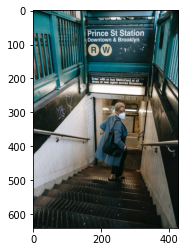

In [33]:
image = cv2.imread(f)
view_image(image) 

Inspect image contents

In [34]:
print(image.shape)

(640, 427, 3)


Gray-scale

(640, 427)
18


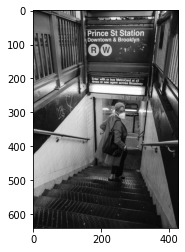

In [35]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)
print(image_gray[0, 0])
view_image(image_gray)

X gradient

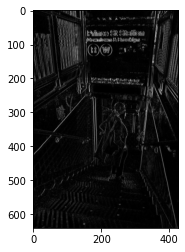

In [36]:
sobelx = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.abs(sobelx)
view_image(abs_sobelx / np.max(abs_sobelx))

Y gradient

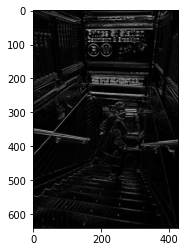

In [37]:
sobely = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1)
abs_sobely = np.abs(sobely)
view_image(abs_sobely / np.max(abs_sobely))

Magnitude of gradient vector

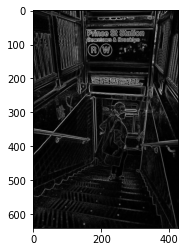

In [38]:
magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
view_image(magnitude / np.max(magnitude))

Canny edge detection

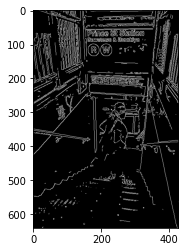

In [39]:
edges = cv2.Canny(image_gray, 200, 250)
view_image(edges)

Theory: Hough transforms

![title](images2/line_diagram.png)

![title](images2/accumulator1.png)

![title](images2/edge_pixel.png)

![title](images2/accumulator2.png)

![title](images2/accumulator3.png)


Hough transform for lines

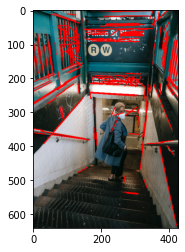

In [40]:
lines = cv2.HoughLinesP(
  edges,
  rho = 1,
  theta= 2 * np.pi/180.0,
  threshold=20,
  minLineLength=25,
  maxLineGap=5
)

i_lines = image.copy()
for l in lines:
  x1, y1, x2, y2 = l[0]
  cv2.line(i_lines, (x1, y1), (x2, y2), (0,0,255), thickness=2)
view_image(i_lines)

Hough transform for circles

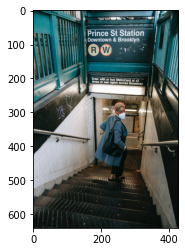

In [41]:
circles = cv2.HoughCircles(
    image_gray,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=35,
    param1=150,
    param2=60,
    minRadius=15,
    maxRadius=25
)

i_circles = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(
            i_circles,
            (x, y),
            r,
            (0, 0, 255),
            thickness=1
        )

view_image(i_circles)


Blur the image first

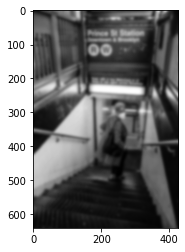

In [42]:
i_blurred = cv2.GaussianBlur(
  image_gray,
  ksize=(21,21),
  sigmaX=0,
)
view_image(i_blurred)

Circle detection on blurred image

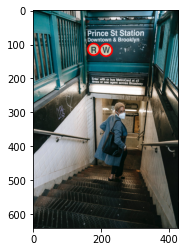

In [43]:
circles = cv2.HoughCircles(
    i_blurred,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=35,
    param1=150,
    param2=40,
    minRadius=15,
    maxRadius=25
)

i_circles = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(
            i_circles,
            (x, y),
            r,
            (0, 0, 255),
            thickness=3
        )

view_image(i_circles)
